In [106]:
import pandas as pd
import numpy as np

url = 'https://s3.amazonaws.com/datarobot_public_datasets/DR_Demo_Fire_Ins_Loss_only.csv'
df = pd.read_csv(url)
df.dtypes



loss                     float64
Exposure                 float64
Rating_Class              object
Sub_Rating_Class          object
Renewal_class             object
Sub_Renewal_Class         object
Property_size            float64
Residents                float64
Commercial                object
Norm_fire_risk           float64
Norm_monthly_rent        float64
Loan_mortgage            float64
No_claim_Years           float64
Previous_claims          float64
Norm_area_m              float64
Premium_remain           float64
Premium_renew            float64
Renewal_Type              object
crime_property_type      float64
crime_residents          float64
crime_area               float64
crime_arson              float64
crime_burglary           float64
crime_neighbour_watch    float64
crime_community          float64
crime_risk               float64
Geographical_risk        float64
Weather_risk             float64
ISO                        int64
ISO_cat                   object
ISO_desc  

In [107]:
# task2 distinguish between numeric/categorical/text/date features
# automatic type detection
# X and y
target_feature = 'loss'

categorical_features = []
numeric_features = []
text_features = []


for c in df.columns:
    if not c == "loss":
        if c == "ISO_desc":
            text_features.append(c)
        elif df[c].dtype == "float64" or df[c].dtype == "int64":
            numeric_features.append(c)
        elif df[c].dtype == "object":
            categorical_features.append(c)

y = df.pop(target_feature)
X = df

print(categorical_features)
print(numeric_features)
print(text_features)
print(target_feature)


['Rating_Class', 'Sub_Rating_Class', 'Renewal_class', 'Sub_Renewal_Class', 'Commercial', 'Renewal_Type', 'ISO_cat']
['Exposure', 'Property_size', 'Residents', 'Norm_fire_risk', 'Norm_monthly_rent', 'Loan_mortgage', 'No_claim_Years', 'Previous_claims', 'Norm_area_m', 'Premium_remain', 'Premium_renew', 'crime_property_type', 'crime_residents', 'crime_area', 'crime_arson', 'crime_burglary', 'crime_neighbour_watch', 'crime_community', 'crime_risk', 'Geographical_risk', 'Weather_risk', 'ISO']
['ISO_desc']
loss


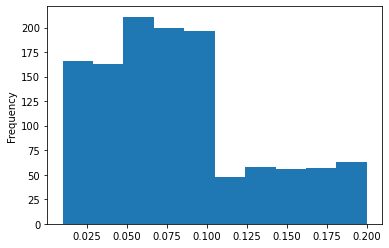

In [108]:
# task2 other exploratory  data analysis

y.plot.hist(50)

In [109]:
y.describe()

count    1217.000000
mean        0.080477
std         0.050425
min         0.010000
25%         0.040000
50%         0.070000
75%         0.100000
max         0.200000
Name: loss, dtype: float64

In [110]:
X.describe()

,Exposure,Property_size,Residents,Norm_fire_risk,Norm_monthly_rent,Loan_mortgage,No_claim_Years,Previous_claims,Norm_area_m,Premium_remain,...,crime_residents,crime_area,crime_arson,crime_burglary,crime_neighbour_watch,crime_community,crime_risk,Geographical_risk,Weather_risk,ISO
count,210.000000,1216.000000,1212.000000,1217.000000,1217.000000,196.000000,1217.000000,353.000000,1047.000000,184.000000,...,910.000000,923.000000,916.000000,922.000000,923.000000,903.000000,923.000000,1211.000000,1213.000000,1217.000000
mean,2.809524,3.820724,2.514026,4.040762,1852.694145,3.286935,1.010640,0.320084,34.265521,69.201087,...,0.958211,0.989317,0.954384,1.044832,0.982719,0.962596,0.992618,1.125001,0.918192,2.889071
std,0.726731,1.598589,1.318972,0.232445,1678.089181,0.243295,0.769526,0.500960,25.261731,43.405041,...,0.403047,0.407156,0.238484,0.523383,0.490376,0.254882,0.358018,1.918566,1.094440,1.598731
min,1.000000,1.000000,1.000000,3.776480,500.000000,2.673639,0.000000,0.000000,0.000000,0.000000,...,0.360578,0.065520,0.472193,0.154595,0.000000,0.522494,0.175763,0.000000,0.000000,1.000000
25%,2.000000,3.000000,1.000000,3.898949,783.693499,3.144307,0.000000,0.000000,16.000000,4.000000,...,0.625186,0.687961,0.739102,0.572656,0.686813,0.739831,0.767780,0.091752,0.273559,2.000000
50%,3.000000,3.500000,2.000000,3.898949,1232.882801,3.339025,1.048147,0.000000,30.000000,99.000000,...,0.903848,0.924562,0.942690,1.019386,0.989819,0.924495,0.974872,0.392954,0.550059,3.000000
75%,3.000000,5.000000,4.000000,4.171214,2248.569323,3.474623,1.665109,0.832555,47.000000,100.000000,...,1.210431,1.190282,1.130489,1.322650,1.191823,1.110430,1.193020,1.059832,1.204226,4.000000
max,5.000000,8.000000,6.000000,5.123351,13296.240070,3.714656,2.639501,1.893018,208.000000,100.000000,...,2.970605,4.145968,1.926021,2.391149,4.322882,2.043525,2.641966,8.548033,9.098934,6.000000


In [139]:
len(X.columns)

30

In [111]:
# feature enginering

In [112]:
# CV partitioning (keep 10-20% for holdout).

from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# y should be an ndarray
y_train = y_train.values
y_test = y_test.values

In [114]:
# pipeline which can train model.
# categorical  ->  one-hot encoding  ->                 ->
# numeric      ->  imputation        -> standarization  -> linear regression
# text         ->  tf-idf            ->                 ->

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet

categorical_pipeline = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
       
    
text_pipeline = Pipeline(steps=[
    ('bow', TfidfVectorizer()),
])

In [137]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
        ('text', text_pipeline, text_features[0])
    ])

est = Pipeline(steps=[('preprocessor', preprocessor),
                       ('rf', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state = 2))])

est.fit(X_train, y_train)
print("model score without optimization: %.4f" % mean_absolute_error(y_test, est.predict(X_test)))

model score without optimization: 0.0373


In [150]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


est = Pipeline(steps=[('preprocessor', preprocessor),
                       ('rf', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state = 2))])


param_dist = {
    'rf__max_depth': np.arange(start = 10,stop = 110,step=20),
    'rf__n_estimators': np.arange(start = 80,stop = 160,step=20), 
              'rf__max_features':np.arange(start = 1,stop = 30,step=1),
              'rf__criterion': ['mse', 'mae']}

gs = GridSearchCV(estimator=est, param_grid=param_dist, 
                  scoring='neg_mean_absolute_error', cv=3, refit=True, verbose=3, n_jobs=-1)


gs.fit(X_train, y_train)

print("best params: {}".format(gs.best_params_))
print("model score: %.4f" % mean_absolute_error(y_test, gs.best_estimator_.predict(X_test)))

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 3480 out of 3480 | elapsed: 20.8min finished


best params: {'rf__criterion': 'mse', 'rf__max_depth': 30, 'rf__max_features': 24, 'rf__n_estimators': 80}
model score: 0.0368


In [143]:
est.get_params().keys()

dict_keys(['memory', 'steps', 'preprocessor', 'rf', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__text', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocessor__cat__imputer__copy', 'preprocessor__cat__imputer__fill_value', 'preprocessor__cat__imputer__missing_values', 'preprocessor__cat__imputer__strategy', 'preprocessor__cat_

Reports scores of models.

model score before optimization is 0.0373 


After optimiation with best parameters {'rf__criterion': 'mse', 'rf__max_depth': 30, 'rf__max_features': 24, 'rf__n_estimators': 80} score is  0.0368